<a href="https://colab.research.google.com/github/mayank18mtnl/CODINGSAATHI/blob/main/stock_prediction_MayankMaiti.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **STOCK MARKET PREDICTION AND FORCASTING**
# LEVEL 1 TASK 2
To predict the Stock based on the previous stock data and produce the graphical representaion of the prediction.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
data = pd.read_csv(" https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv")
data

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...,...
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17


In [ ]:
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [ ]:
data.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [ ]:
data['Date']=pd.to_datetime(data['Date'])
print(type(data.Date[0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [ ]:
df=data.sort_values(by='Date')
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


In [ ]:
df.reset_index(inplace=True)

In [ ]:
df.head()

,index,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
1,2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2,2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
3,2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
4,2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


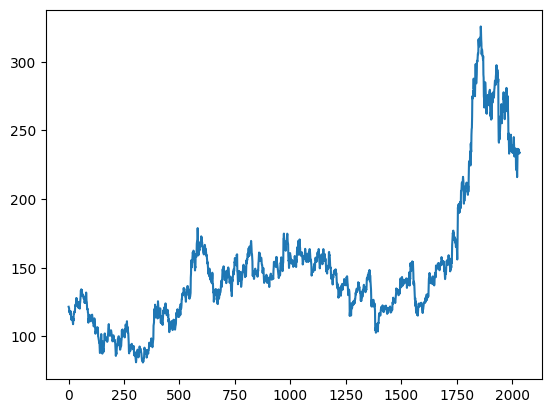

In [ ]:
plt.plot(df['Close'])

In [ ]:
df1=df['Close']

In [ ]:
scalar=MinMaxScaler(feature_range=(0,1))
df1=scalar.fit_transform(np.array(df1).reshape(-1,1))
df1

array([[0.16584967],
       [0.16319444],
       [0.1621732 ],
       ...,
       [0.62622549],
       [0.62214052],
       [0.62418301]])

In [ ]:
training_size=int(len(df1)*0.70)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [ ]:
training_size,test_size

(1424, 611)

In [ ]:
def create_dataset(dataset,time_step=1):
  dataX,dataY=[],[]
  for i in range(len(dataset)-time_step-1):
    a=dataset[i:i+time_step,0]
    dataX.append(a)
    dataY.append(dataset[i+time_step,0])
  return np.array(dataX),np.array(dataY)

In [ ]:
time_step=100
X_train,y_train = create_dataset(train_data,time_step)
X_test,y_test = create_dataset(test_data,time_step)

In [ ]:
print(X_train.shape),print(y_train.shape)

(1323, 100)
(1323,)


(None, None)

In [ ]:
print(X_test.shape),print(y_test.shape)

(510, 100)
(510,)


(None, None)

In [ ]:
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [ ]:
mod=Sequential()
mod.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
mod.add(LSTM(50,return_sequences=True))
mod.add(LSTM(50))
mod.add(Dense(1))
mod.compile(loss='mean_squared_error',optimizer='adam')
mod.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
mod.fit(X_train,y_train,validation_split=0.1,epochs=50,batch_size=64,verbose=1)

Epoch 1/50
19/19 [==============================] - 16s 545ms/step - loss: 0.0123 - val_loss: 0.0013
Epoch 2/50
19/19 [==============================] - 4s 200ms/step - loss: 0.0022 - val_loss: 0.0016
Epoch 3/50
19/19 [==============================] - 4s 196ms/step - loss: 9.8278e-04 - val_loss: 0.0013
Epoch 4/50
19/19 [==============================] - 6s 302ms/step - loss: 8.5581e-04 - val_loss: 0.0011
Epoch 5/50
19/19 [==============================] - 4s 196ms/step - loss: 8.1411e-04 - val_loss: 0.0011
Epoch 6/50
19/19 [==============================] - 4s 194ms/step - loss: 7.8004e-04 - val_loss: 0.0010
Epoch 7/50
19/19 [==============================] - 5s 265ms/step - loss: 7.4890e-04 - val_loss: 0.0010
Epoch 8/50
19/19 [==============================] - 4s 228ms/step - loss: 7.1536e-04 - val_loss: 8.7776e-04
Epoch 9/50
19/19 [==============================] - 4s 195ms/step - loss: 7.0654e-04 - val_loss: 0.0011
Epoch 10/50
19/19 [==============================] - 4s 232ms/step 

In [ ]:
train_predict1=mod.predict(X_train)
test_predict2=mod.predict(X_test)

16/16 [==============================] - 1s 45ms/step


In [ ]:
train_predict1

array([[0.14850532],
       [0.14331338],
       [0.13933982],
       ...,
       [0.17141923],
       [0.16823381],
       [0.16525555]], dtype=float32)

In [ ]:
test_predict2

array([[0.261692  ],
       [0.26314735],
       [0.2614022 ],
       [0.2538548 ],
       [0.2465588 ],
       [0.24182925],
       [0.24274072],
       [0.24721174],
       [0.25054222],
       [0.25160688],
       [0.25163627],
       [0.25442332],
       [0.25706196],
       [0.2620303 ],
       [0.2694979 ],
       [0.26732618],
       [0.26070687],
       [0.25667936],
       [0.25589088],
       [0.2681741 ],
       [0.28434917],
       [0.2974767 ],
       [0.3045722 ],
       [0.30206352],
       [0.29970145],
       [0.2967335 ],
       [0.29594946],
       [0.29989594],
       [0.30370986],
       [0.3059724 ],
       [0.30824474],
       [0.30611423],
       [0.2969104 ],
       [0.27847424],
       [0.2620778 ],
       [0.25236318],
       [0.24884288],
       [0.24613462],
       [0.24030529],
       [0.22937244],
       [0.21879432],
       [0.21107891],
       [0.2022618 ],
       [0.19681478],
       [0.18945599],
       [0.18023919],
       [0.17502233],
       [0.171

In [ ]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_test,test_predict2))

0.02518886146068624

In [ ]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict1))

0.01939391419523227

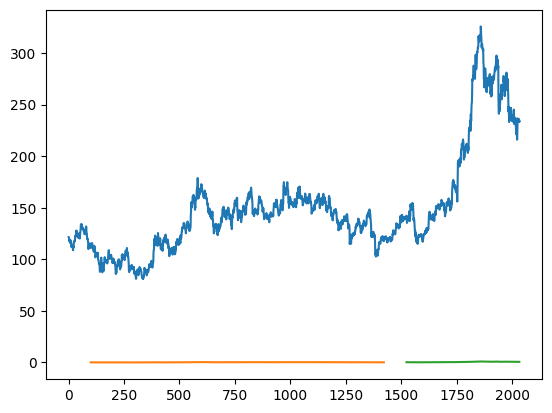

In [ ]:
look_back = 100

trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict1) + look_back, :] = train_predict1

testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict1) + (look_back * 2) + 1:len(df1) - 1, :] = test_predict2

plt.plot(scalar.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


In [ ]:
len(test_data)

611

In [ ]:
x_input=test_data[511:].reshape(1,-1)
x_input.shape

(1, 100)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
temp_input

[0.8527369281045751,
 0.8621323529411764,
 0.8345588235294117,
 0.84375,
 0.7146650326797386,
 0.6605392156862745,
 0.6542075163398693,
 0.6803513071895424,
 0.6689133986928104,
 0.6642156862745099,
 0.678921568627451,
 0.6913807189542482,
 0.7089460784313726,
 0.7226307189542485,
 0.7340686274509802,
 0.7212009803921569,
 0.749795751633987,
 0.7689950980392157,
 0.7446895424836601,
 0.7120098039215685,
 0.7467320261437909,
 0.7549019607843137,
 0.7604166666666667,
 0.7598039215686274,
 0.7465277777777777,
 0.7624591503267975,
 0.7706290849673203,
 0.8041258169934642,
 0.7810457516339868,
 0.7941176470588236,
 0.7602124183006536,
 0.7348856209150327,
 0.7240604575163399,
 0.7399918300653596,
 0.749795751633987,
 0.7614379084967322,
 0.7542892156862746,
 0.7475490196078431,
 0.769607843137255,
 0.7495915032679739,
 0.8171977124183007,
 0.8020833333333335,
 0.7773692810457518,
 0.7571486928104576,
 0.7937091503267975,
 0.7916666666666667,
 0.7714460784313726,
 0.7526552287581698,
 0.7269

In [ ]:
from numpy import array
lst_output=[]
n_steps=100
i=0
while(i<30):
  if (len(temp_input)>100):
    #print(temp_input)
    x_input=np.array(temp_input[1:])
    print("{} day input {}".format(i,x_input))
    x_input=x_input.reshape(1,-1)
    x_input=x_input.reshape((1,n_steps,1))
    #print(x_input)
    yhat=mod.predict(x_input, verbose=0)
    print("{} day output {}".format(i,yhat))
    temp_input.extend(yhat[0].tolist())
    temp_input=temp_input[1:]
    #print(temp_input)
    lst_output.extend(yhat.tolist())
    i=i+1
  else:
    x_input=x_input.reshape((1,n_steps,1))
    yhat=mod.predict(x_input, verbose=0)
    print(yhat[0])
    temp_input.extend(yhat[0].tolist())
    print(len(temp_input))
    lst_output.extend(yhat.tolist())
    i=i+1

print(lst_output)

0 day input [0.67790033 0.63194444 0.63112745 0.62785948 0.64767157 0.63991013
 0.63480392 0.63868464 0.62336601 0.62745098 0.63970588 0.64705882
 0.66196895 0.67075163 0.65196078 0.63112745 0.61294935 0.6376634
 0.62254902 0.62745098 0.63337418 0.62642974 0.63623366 0.58312908
 0.57781863 0.57230392 0.58006536 0.57618464 0.55167484 0.57883987
 0.625      0.63582516 0.62949346 0.62888072 0.62765523 0.62234477
 0.63378268 0.62622549 0.62214052 0.62418301 0.62483078 0.6260125
 0.62752736 0.62926412 0.63099575 0.63253146 0.63376957 0.63469315
 0.6353479  0.63581336 0.63617885 0.63652366 0.63690591 0.63735712
 0.63788533 0.63847983 0.63911867 0.63977629 0.64042997 0.64106238
 0.64166445 0.64223439 0.64277518 0.64329445 0.64380044 0.6443001
 0.64479929 0.64530098 0.64580613 0.64631355 0.64682156 0.64732748
 0.64782912 0.64832497 0.64881384 0.64929527 0.64976978 0.65023768
 0.65070003 0.65115726 0.65160984 0.6520583  0.6525026  0.65294272
 0.65337843 0.65380967 0.65423626 0.65465808 0.655075

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
len(df1)

2035

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df1)

StandardScaler()

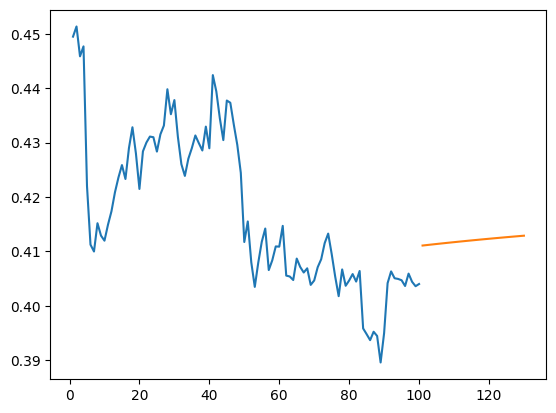

In [ ]:
plt.plot(day_new,scaler.inverse_transform(df1[1935:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

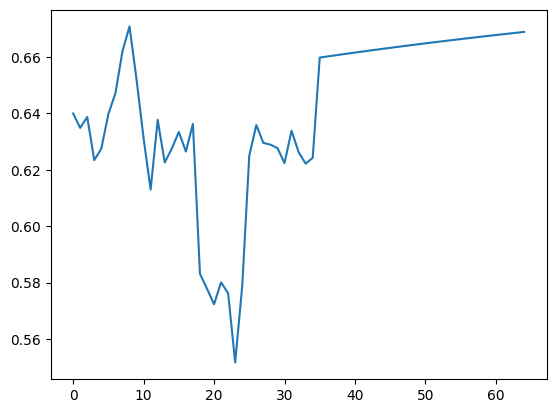

In [ ]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[2000:])

In [ ]:
df3=scaler.inverse_transform(df3).tolist()

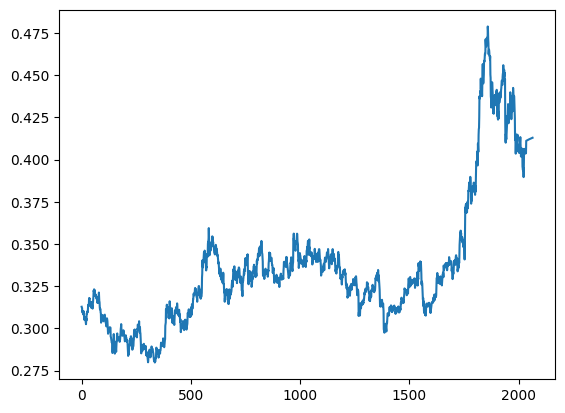

In [ ]:
plt.plot(df3)